## Question 3: Loan Application Modelling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We will be working on a loan application modelling problem. The aim of this problem is to modify the parameters to achieve the highest accuracy. 


To create a loan application modelling, we first read in the dataset with pandas library. The dataset consists of 2350 rows and 21 columns. The columns of the dataset has change from lower case to upper case for a better view. 

In [2]:
df = pd.read_csv("Bank_CreditScoring.csv")
df.columns = df.columns.str.upper()
df

,CREDIT_CARD_EXCEED_MONTHS,EMPLOYMENT_TYPE,LOAN_AMOUNT,LOAN_TENURE_YEAR,MORE_THAN_ONE_PRODUCTS,CREDIT_CARD_MORE_THAN_MONTHS,NUMBER_OF_DEPENDENTS,YEARS_TO_FINANCIAL_FREEDOM,NUMBER_OF_CREDIT_CARD_FACILITY,NUMBER_OF_PROPERTIES,...,NUMBER_OF_LOAN_TO_APPROVE,PROPERTY_TYPE,YEARS_FOR_PROPERTY_TO_COMPLETION,STATE,NUMBER_OF_SIDE_INCOME,MONTHLY_SALARY,TOTAL_SUM_OF_LOAN,TOTAL_INCOME_FOR_JOIN_APPLICATION,DECISION,SCORE
0,1,employer,456509,16,yes,1,2,5,2,2,...,1,condominium,10,Johor,2,12262,853141,16025,Reject,7
1,1,employer,605505,19,no,1,2,5,2,2,...,2,condominium,10,Johor,2,9251,882901,17082,Accept,9
2,1,employer,294133,19,yes,1,2,5,2,2,...,3,condominium,10,Johor,2,4919,540489,12613,Reject,8
3,1,employer,490216,20,no,1,2,5,2,2,...,1,condominium,10,Johor,1,4459,536727,10952,Accept,9
4,1,employer,292728,14,yes,1,2,5,2,2,...,2,condominium,10,Johor,3,5628,774695,11209,Reject,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,6,Fresh_Graduate,339461,15,no,2,3,15,2,2,...,2,terrace,11,Kuala Lumpur,1,10895,1388015,15256,Reject,7
2346,6,Fresh_Graduate,690944,13,yes,2,3,15,2,2,...,2,terrace,11,Kuala Lumpur,3,11971,1147984,11842,Accept,7
2347,6,Fresh_Graduate,321921,13,no,2,3,15,2,2,...,2,terrace,11,Kuala Lumpur,1,4175,685580,16619,Accept,7
2348,6,Fresh_Graduate,393555,14,yes,2,3,15,2,2,...,2,terrace,11,Kuala Lumpur,2,5011,673748,13892,Reject,7


A copy has made from the original dataset to ensure the changes or further implement on it. 

In [3]:
df_copy = df.copy()

This dataset consists of inconsistent state name. Therefore, we have replace it to makesure the data consistency.

In [4]:
df_copy['STATE'] = df_copy['STATE'].replace(['Johor B'],'Johor')
df_copy['STATE'] = df_copy['STATE'].replace(['N.Sembilan'],'N.S')
df_copy['STATE'] = df_copy['STATE'].replace(['Pulau Penang'],'P.Pinang')
df_copy['STATE'] = df_copy['STATE'].replace(['Penang'],'P.Pinang')
df_copy['STATE'] = df_copy['STATE'].replace(['SWK'],'Sarawak')
df_copy.head()

,CREDIT_CARD_EXCEED_MONTHS,EMPLOYMENT_TYPE,LOAN_AMOUNT,LOAN_TENURE_YEAR,MORE_THAN_ONE_PRODUCTS,CREDIT_CARD_MORE_THAN_MONTHS,NUMBER_OF_DEPENDENTS,YEARS_TO_FINANCIAL_FREEDOM,NUMBER_OF_CREDIT_CARD_FACILITY,NUMBER_OF_PROPERTIES,...,NUMBER_OF_LOAN_TO_APPROVE,PROPERTY_TYPE,YEARS_FOR_PROPERTY_TO_COMPLETION,STATE,NUMBER_OF_SIDE_INCOME,MONTHLY_SALARY,TOTAL_SUM_OF_LOAN,TOTAL_INCOME_FOR_JOIN_APPLICATION,DECISION,SCORE
0,1,employer,456509,16,yes,1,2,5,2,2,...,1,condominium,10,Johor,2,12262,853141,16025,Reject,7
1,1,employer,605505,19,no,1,2,5,2,2,...,2,condominium,10,Johor,2,9251,882901,17082,Accept,9
2,1,employer,294133,19,yes,1,2,5,2,2,...,3,condominium,10,Johor,2,4919,540489,12613,Reject,8
3,1,employer,490216,20,no,1,2,5,2,2,...,1,condominium,10,Johor,1,4459,536727,10952,Accept,9
4,1,employer,292728,14,yes,1,2,5,2,2,...,2,condominium,10,Johor,3,5628,774695,11209,Reject,8


## Exploratory Data Analysis

An overall correlation plot is used to determine the correlation between each variables. Based on the plot, it shows that the 'YEARS_TO_FINANCIAL_FREEDOM' is highly correlated to the 'CREDIT_CARD_MORE_THAN_MONTHS' and 'NUMBER_OF_DEPENDENTS' with a value of 0.8.

[Text(0.5, 1.0, 'Heapmap')]

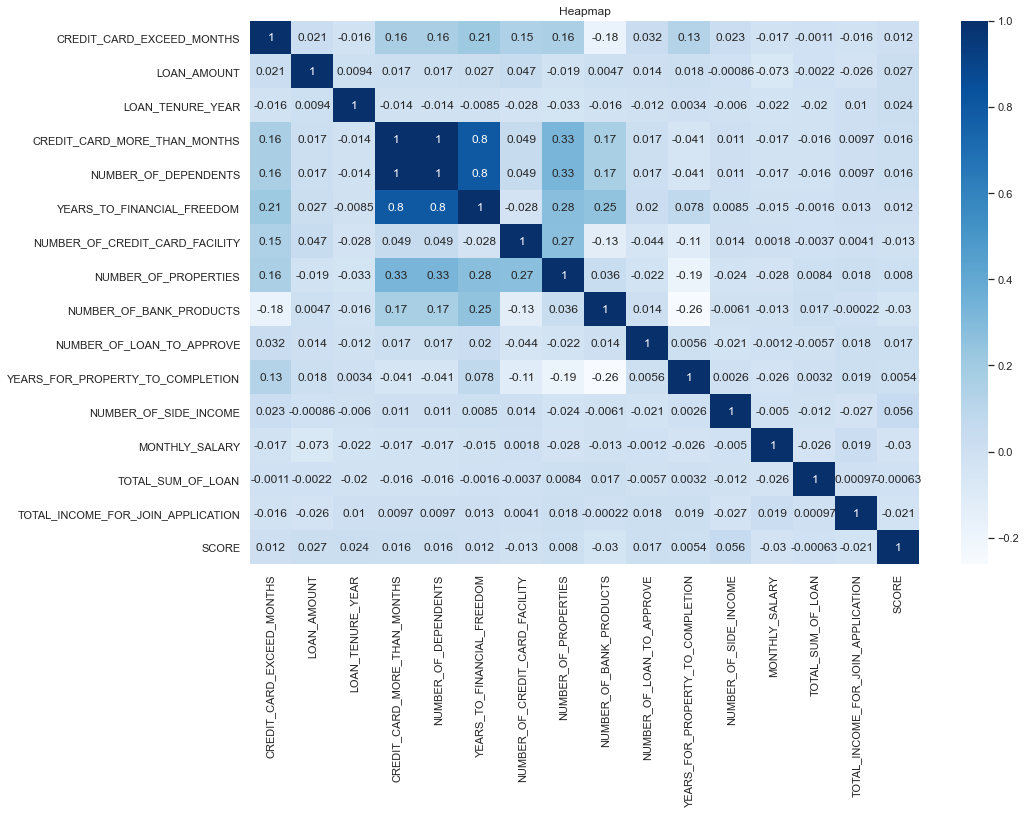

In [5]:
sns.set(rc={'figure.figsize':(15,10)})
matrix = df_copy.corr()
sns.heatmap(data= matrix,annot=True,cmap='Blues').set(title='Heapmap')

The bar chart below shows the total amount of side income among the employment type. Based on the bar graph, employee has a total of 1211 side income which indicates the highest amount of side income among the other employment type. 

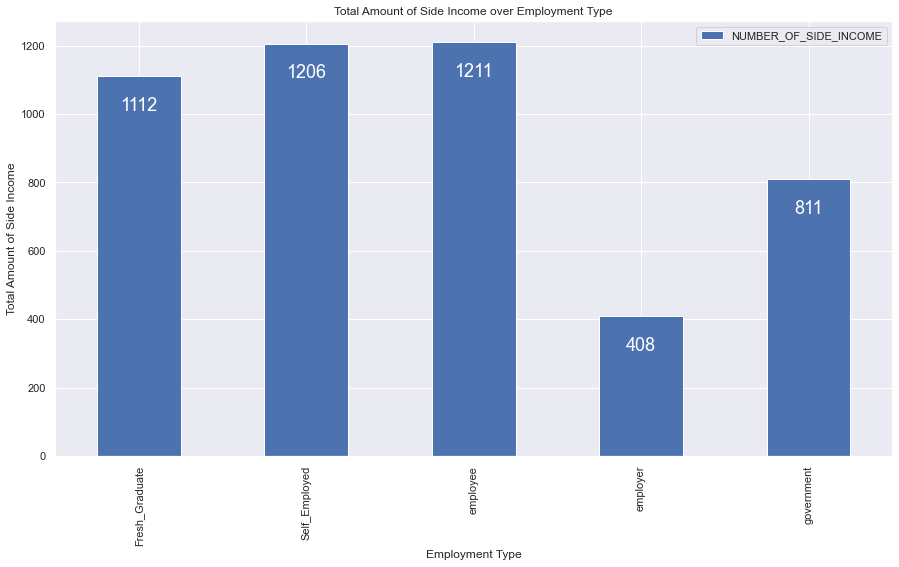

In [6]:
fig,ax = plt.subplots(figsize=(15,8))
ax = df_copy.groupby(['EMPLOYMENT_TYPE']).agg({'NUMBER_OF_SIDE_INCOME':'sum'}).plot(kind='bar',ax=ax)
plt.xlabel("Employment Type")
plt.ylabel("Total Amount of Side Income")
plt.title("Total Amount of Side Income over Employment Type")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='white', size=18)

From the bar chart above, we know that the employee has the highest total amount of side income. We will now determine what is the number of side income employees have. From the graph, it shows that 213 employees have 2 side incomes followed by 199 have 3 side incomes and the lastly is 188 of them have only 1 side income. 

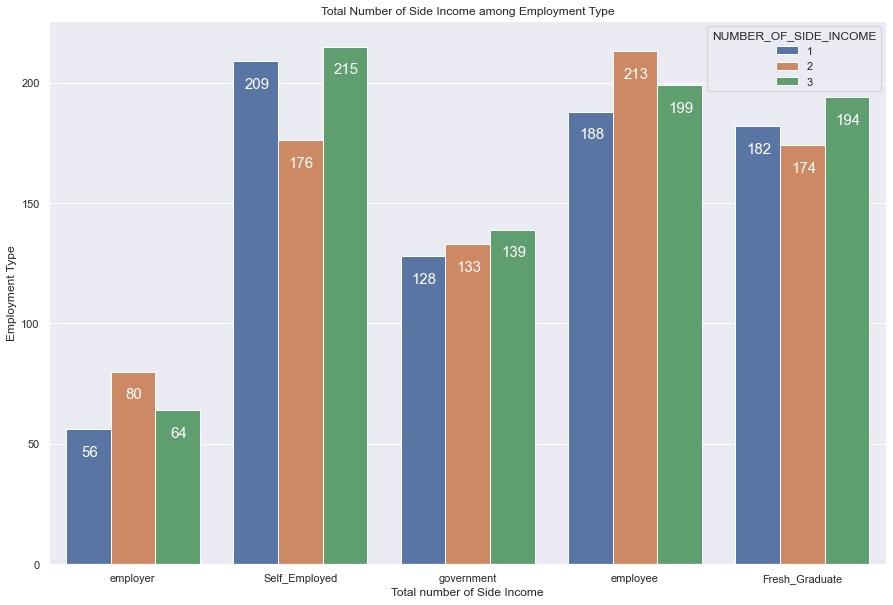

In [7]:
ax = sns.countplot(x='EMPLOYMENT_TYPE',hue='NUMBER_OF_SIDE_INCOME',data=df_copy)
sns.set(rc={'figure.figsize':(15,8)})
plt.title("Total Number of Side Income among Employment Type")
plt.xlabel("Total number of Side Income")
plt.ylabel("Employment Type")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.14, p.get_height()), ha='center', va='top', color='white', size=15)

The line plot shows the maximum number of monthly salary among employment type. It shows that work as an employee has the maximum number of monthly salary where government employment type has the least monthly salary. 

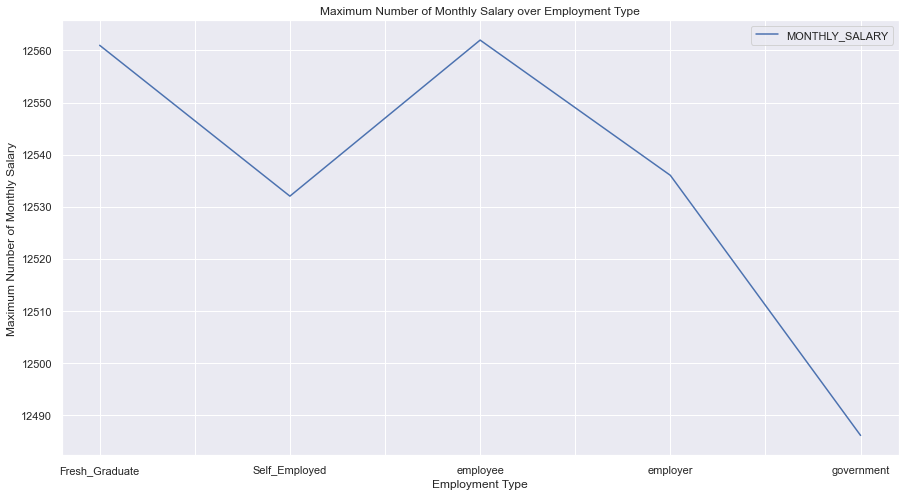

In [8]:
fig,ax = plt.subplots(figsize=(15,8))
ax = df_copy.groupby(['EMPLOYMENT_TYPE']).agg({'MONTHLY_SALARY':'max'}).plot(kind='line',ax=ax)
plt.xlabel("Employment Type")
plt.ylabel("Maximum Number of Monthly Salary")
plt.title("Maximum Number of Monthly Salary over Employment Type")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='white', size=18)

The bar chart below shows the score over the employment type. From the bar chart, we can see that employee has the highest score in 9. The overall score of employee is considered as trustable. 

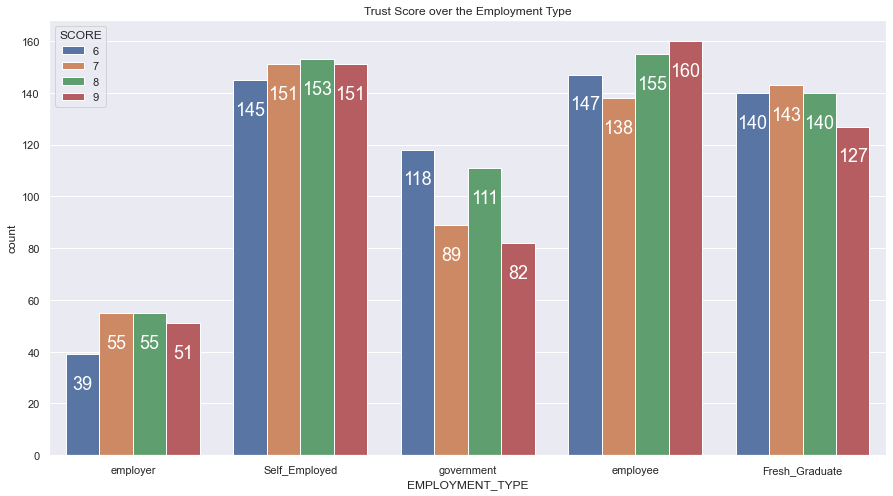

In [9]:
ax = sns.countplot(x='EMPLOYMENT_TYPE',hue='SCORE',data=df_copy)
sns.set(rc={'figure.figsize':(20,5)})
plt.title("Trust Score over the Employment Type")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()), ha='center', va='top', color='white', size=18)

The line graph below shows the trend of the loan amount over employment type. Based on the line graph, employee has the chance to borrow a higher number of loan amount compare to the others. Employer has the lower chance to borrow a higher number of loan amount. 

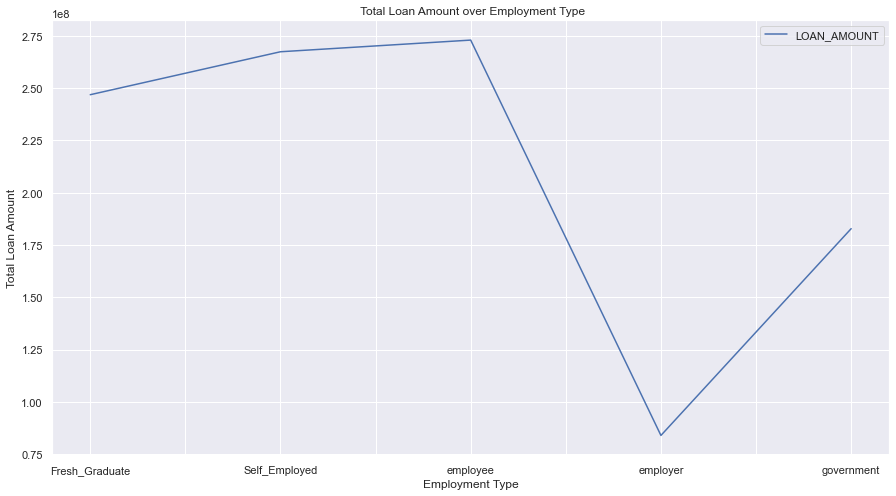

In [10]:
fig,ax = plt.subplots(figsize=(15,8))
ax = df_copy.groupby(['EMPLOYMENT_TYPE']).agg({'LOAN_AMOUNT':'sum'}).plot(kind='line',ax=ax)
plt.xlabel("Employment Type")
plt.ylabel("Total Loan Amount")
plt.title(" Total Loan Amount over Employment Type")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='white', size=18)

The bar chart shows the number of loan to approve over employment type. It shows that employee has the highest number of loan to approve. This might due to the employee has borrow the highest amount of loan. 

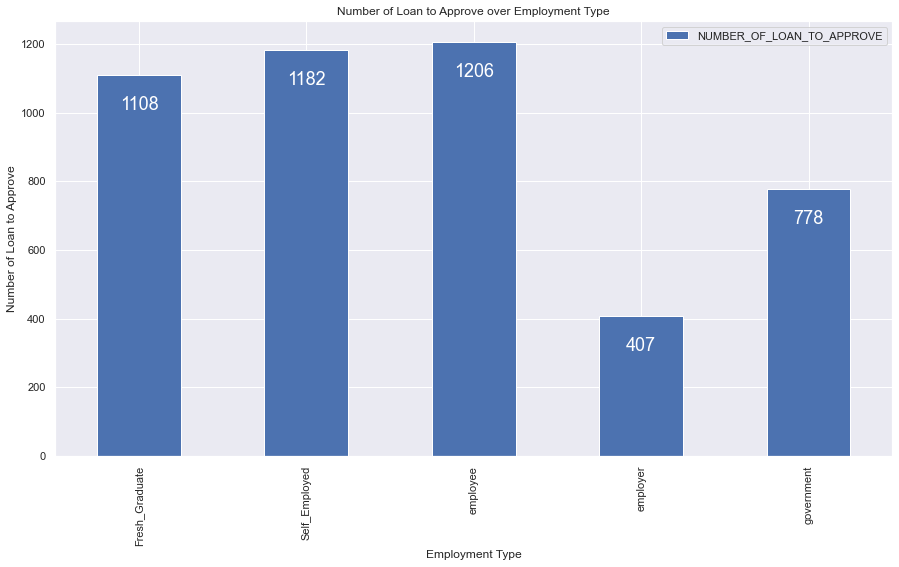

In [11]:
fig,ax = plt.subplots(figsize=(15,8))
ax =df_copy.groupby(['EMPLOYMENT_TYPE']).agg({'NUMBER_OF_LOAN_TO_APPROVE':'sum'}).plot(kind='bar',ax=ax)
plt.xlabel("Employment Type",)
plt.ylabel("Number of Loan to Approve")
plt.title("Number of Loan to Approve over Employment Type")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='white', size=18)

The bar chart shows the decision among the employment type. Employee type has the highest accept decision while self employed type has the highest reject decision. This may due to the employee has the highest amount of monthly salary, more side incomes and highest trust score. Therefore, it can be conclude that employee has the possibility to borrow a higher amount of loan and has more number of loan to approve. Then it indicates that the accept decision rate in employee is higher than other employment type. 

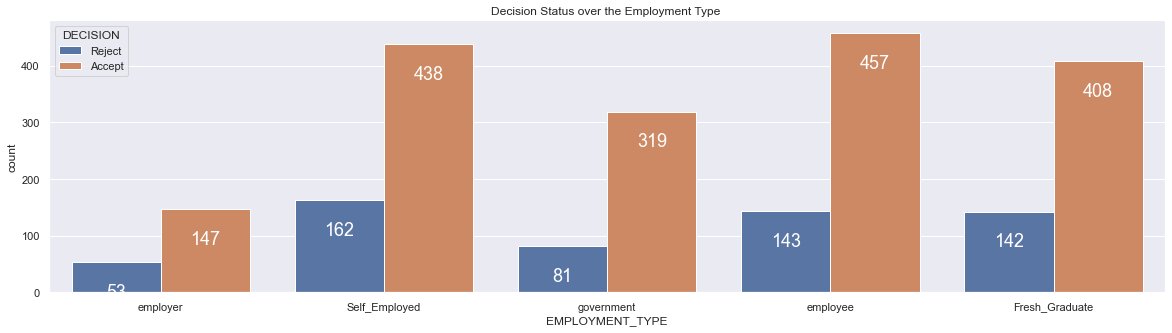

In [12]:
ax = sns.countplot(x='EMPLOYMENT_TYPE',hue='DECISION',data=df_copy)
sns.set(rc={'figure.figsize':(20,5)})
plt.title("Decision Status over the Employment Type ")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

## Model Construction

For model construction, both supervised machine learning and unsupervised machine learning methods have been applied. There are two types of supervised machine learning method where Naive Bayes and Decision Tree Classifier have been applied. In addition, the K-Means clustering has applied as unsupervised machine learning method. 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
score_list = [] 

In [15]:
X = df_copy.drop(['DECISION'],axis=1)
y = df_copy[['DECISION']]

X = pd.get_dummies(X, drop_first=True)
X

,CREDIT_CARD_EXCEED_MONTHS,LOAN_AMOUNT,LOAN_TENURE_YEAR,CREDIT_CARD_MORE_THAN_MONTHS,NUMBER_OF_DEPENDENTS,YEARS_TO_FINANCIAL_FREEDOM,NUMBER_OF_CREDIT_CARD_FACILITY,NUMBER_OF_PROPERTIES,NUMBER_OF_BANK_PRODUCTS,NUMBER_OF_LOAN_TO_APPROVE,...,PROPERTY_TYPE_terrace,STATE_K.L,STATE_Kedah,STATE_Kuala Lumpur,STATE_N.S,STATE_P.Pinang,STATE_Sabah,STATE_Sarawak,STATE_Selangor,STATE_Trengganu
0,1,456509,16,1,2,5,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,605505,19,1,2,5,2,2,1,2,...,0,0,0,0,0,0,0,0,0,0
2,1,294133,19,1,2,5,2,2,1,3,...,0,0,0,0,0,0,0,0,0,0
3,1,490216,20,1,2,5,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,292728,14,1,2,5,2,2,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,6,339461,15,2,3,15,2,2,5,2,...,1,0,0,1,0,0,0,0,0,0
2346,6,690944,13,2,3,15,2,2,5,2,...,1,0,0,1,0,0,0,0,0,0
2347,6,321921,13,2,3,15,2,2,5,2,...,1,0,0,1,0,0,0,0,0,0
2348,6,393555,14,2,3,15,2,2,5,2,...,1,0,0,1,0,0,0,0,0,0


The dataset has split into 70% of training set and 30% of testing purpose. 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(),test_size = 0.30,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1645, 33)
(705, 33)
(1645,)
(705,)


## Classification

Classification is a two step process. It has been distributed as model construction and model usage. Model construction describe a set of predetermined class and is determined by the class label attribute. Also, it represents classification rules, decision trees and mathematical formula. Despite, model usage is used for classifying future or unknown objects. To estimate the accuracy of the model, the known label of test sample is compared with the classified result from model construction. The accuracy score shows how is the test sample are correctly classified  by the model. 

### Naive Bayes

The Naive Bayes is a classification technique that based on Bayesian theorem with an assumption of independence among predictors. The Bayes theorem provides a way of calculation the posterior probability from likelihood and prior probability. Also, the Naive Bayes classifier handle missing values by ignoring the instance during propability estimate calculations. 

In [17]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [18]:
y_pred = nb.predict(X_test)

In [19]:
scores = nb.score(X_test, y_test)

score_list.append(scores)
scores

0.7659574468085106

### Decision Tree Classifier 

Decision tree algorithm has the capability to solve for both regression and classification problems. The decision tree classifier is used to create a training model that can predict the class or value of the target variable by learning the simple decision rules that inferred from the train datasets. To predict a class label, we start from the root of the tree. The tree is constructed in a top-down recuisive divide-and-conquer manner. The decision tree classifier will stop partitioning if there are no remaining attributes for further splitting. 

In this case, both gini and entropy has include and compare to select the best decision tree classifier. The gini index has values inside the interval from 0 to 0.5 whereas the interval of entropy is 0 to 1. Therefore, the gini impurity is better compared to entropy for selecting the best features. The 'max_depth' parameter controls the overall complexity of the classifier. It allows to get a trade-off between an under-fitted or over-fitted classifier. The 'max_depth' indicates how deep the tree can be. The deeper the tree, the more splits it has and captures more information about the data. It is also a way to prepune a tree. 

In [20]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

clf = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42)
clf.get_params()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

scores2 = clf.score(X_test, y_test)
score_list.append(scores2)
scores2

0.7588652482269503

The accuracy score for both classification model has stored in a list. From the table, it shows that the Decision Tree Classifier has a higher accuracy score compared as Naive Bayes. In this case, the Decision Tree Classifier with gini criteria is more outperformed than the classifier with entropy criteria. 

In [21]:
model_name = ['Naive Bayes','Decision Tree Classifier']
df_score = pd.DataFrame(score_list,index=model_name,columns=['Accuracy Score'])
df_score

,Accuracy Score
Naive Bayes,0.765957
Decision Tree Classifier,0.758865


In [22]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=42)
clf.get_params()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

clf.score(X_test, y_test)

0.7418439716312056

## Cluster Analysis

Cluster analysis is grouping a set of data objects into clusters.It is an unsupervised machine learning method where no predefined classes or dependent variable.A good clustering method will produce high quality clusters with high intra-class similarity and low inter-class similarity.

### K-means clustering

K-means clustering is types of partitioning algorithms by constructing various partitions and evaluate them by some criterion. K-means clustering is conceptually the most simple method that should be used first on new data.

In [23]:
df2= pd.read_csv('Bank_CreditScoring.csv')
df2.columns = df2.columns.str.upper()
df2

,CREDIT_CARD_EXCEED_MONTHS,EMPLOYMENT_TYPE,LOAN_AMOUNT,LOAN_TENURE_YEAR,MORE_THAN_ONE_PRODUCTS,CREDIT_CARD_MORE_THAN_MONTHS,NUMBER_OF_DEPENDENTS,YEARS_TO_FINANCIAL_FREEDOM,NUMBER_OF_CREDIT_CARD_FACILITY,NUMBER_OF_PROPERTIES,...,NUMBER_OF_LOAN_TO_APPROVE,PROPERTY_TYPE,YEARS_FOR_PROPERTY_TO_COMPLETION,STATE,NUMBER_OF_SIDE_INCOME,MONTHLY_SALARY,TOTAL_SUM_OF_LOAN,TOTAL_INCOME_FOR_JOIN_APPLICATION,DECISION,SCORE
0,1,employer,456509,16,yes,1,2,5,2,2,...,1,condominium,10,Johor,2,12262,853141,16025,Reject,7
1,1,employer,605505,19,no,1,2,5,2,2,...,2,condominium,10,Johor,2,9251,882901,17082,Accept,9
2,1,employer,294133,19,yes,1,2,5,2,2,...,3,condominium,10,Johor,2,4919,540489,12613,Reject,8
3,1,employer,490216,20,no,1,2,5,2,2,...,1,condominium,10,Johor,1,4459,536727,10952,Accept,9
4,1,employer,292728,14,yes,1,2,5,2,2,...,2,condominium,10,Johor,3,5628,774695,11209,Reject,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,6,Fresh_Graduate,339461,15,no,2,3,15,2,2,...,2,terrace,11,Kuala Lumpur,1,10895,1388015,15256,Reject,7
2346,6,Fresh_Graduate,690944,13,yes,2,3,15,2,2,...,2,terrace,11,Kuala Lumpur,3,11971,1147984,11842,Accept,7
2347,6,Fresh_Graduate,321921,13,no,2,3,15,2,2,...,2,terrace,11,Kuala Lumpur,1,4175,685580,16619,Accept,7
2348,6,Fresh_Graduate,393555,14,yes,2,3,15,2,2,...,2,terrace,11,Kuala Lumpur,2,5011,673748,13892,Reject,7


In [24]:
from sklearn.preprocessing import LabelEncoder

df2['DECISION'] = LabelEncoder().fit_transform(df2['DECISION'])

The dataset has split into x and y as training and testing purpose. The decision column has dropped for testing purpose. Then, a dummy function has apply to the train dataset as it is suitable to apply for categorical variables. 

In [25]:
X = df2.drop('DECISION',axis=1)
y = df2['DECISION']
y

0       1
1       0
2       1
3       0
4       1
       ..
2345    1
2346    0
2347    0
2348    1
2349    0
Name: DECISION, Length: 2350, dtype: int32

In [26]:
X = pd.get_dummies(X,drop_first=True)
X.columns

Index(['CREDIT_CARD_EXCEED_MONTHS', 'LOAN_AMOUNT', 'LOAN_TENURE_YEAR',
       'CREDIT_CARD_MORE_THAN_MONTHS', 'NUMBER_OF_DEPENDENTS',
       'YEARS_TO_FINANCIAL_FREEDOM', 'NUMBER_OF_CREDIT_CARD_FACILITY',
       'NUMBER_OF_PROPERTIES', 'NUMBER_OF_BANK_PRODUCTS',
       'NUMBER_OF_LOAN_TO_APPROVE', 'YEARS_FOR_PROPERTY_TO_COMPLETION',
       'NUMBER_OF_SIDE_INCOME', 'MONTHLY_SALARY', 'TOTAL_SUM_OF_LOAN',
       'TOTAL_INCOME_FOR_JOIN_APPLICATION', 'SCORE',
       'EMPLOYMENT_TYPE_Self_Employed', 'EMPLOYMENT_TYPE_employee',
       'EMPLOYMENT_TYPE_employer', 'EMPLOYMENT_TYPE_government',
       'MORE_THAN_ONE_PRODUCTS_yes', 'PROPERTY_TYPE_condominium',
       'PROPERTY_TYPE_flat', 'PROPERTY_TYPE_terrace', 'STATE_Johor B',
       'STATE_K.L', 'STATE_Kedah', 'STATE_Kuala Lumpur', 'STATE_N.S',
       'STATE_N.Sembilan', 'STATE_P.Pinang', 'STATE_Penang',
       'STATE_Pulau Penang', 'STATE_SWK', 'STATE_Sabah', 'STATE_Sarawak',
       'STATE_Selangor', 'STATE_Trengganu'],
      dtype='object')

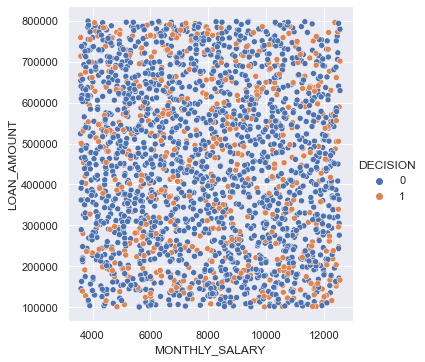

In [27]:
ax = sns.relplot(x="MONTHLY_SALARY", y="LOAN_AMOUNT", hue="DECISION",data=df2)

K-Means clustering is types of partitioning algorithms by constructing various partitions and evaluate them by some criterion. K-Means clustering is conceptually the most simple method that should be used first on new data. 

The K-Means clustering has implement to find the best k clusters for the dataset. There are two types of method have been applied which included the elbow method and silhouette method. The elbow method will be implement first. 

In [28]:
from sklearn.cluster import KMeans 

km = KMeans(n_clusters = 3, random_state=42)
km.fit(X)
label = km.predict(X)
label

array([0, 0, 2, ..., 2, 2, 1])

Based on the elbow method, it shows that 4 is the 'elbow'. 

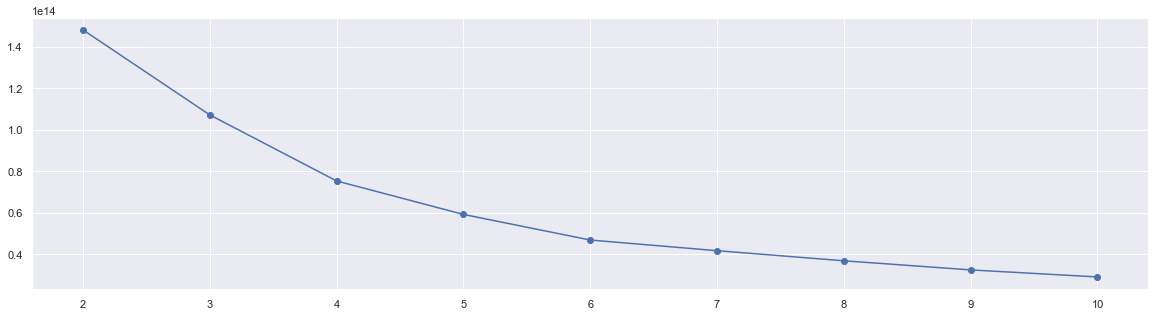

In [29]:
distortions = []
for i in range(2,11):
    km = KMeans(n_clusters=i, init='random',n_init=10,max_iter=300,tol=1e-04,random_state=42)
    
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(2,11),distortions,marker='o')    
plt.show()

Then, we train the clustering methods with 4 clusters.  

In [30]:
km2 = KMeans(n_clusters = 4, random_state=42)
km2.fit(X)
label2 = km.predict(X)
label2

array([0, 3, 1, ..., 1, 0, 2])

In [31]:
df_new = df2.copy()
df_new = df_new.drop("DECISION", axis=1)
df_new['DECISION']=km2.labels_

The original cluster and the new clusters plotted as below:

<AxesSubplot:xlabel='MONTHLY_SALARY', ylabel='LOAN_AMOUNT'>

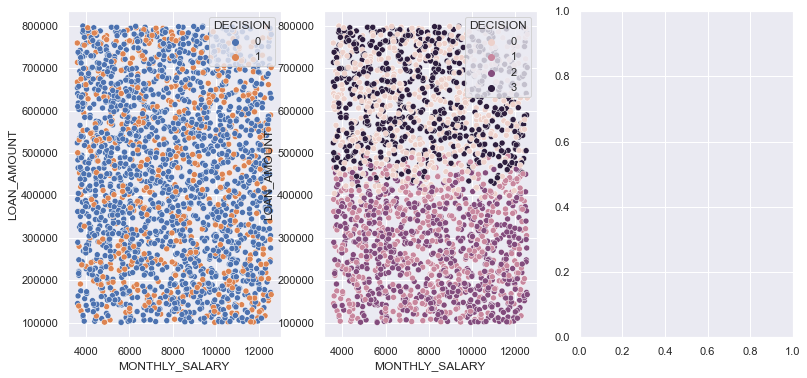

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(13,6))

sns.scatterplot(x="MONTHLY_SALARY", y="LOAN_AMOUNT", hue="DECISION", data=df2, ax=axes[0])
sns.scatterplot(x="MONTHLY_SALARY", y="LOAN_AMOUNT", hue="DECISION", data=df_new, ax=axes[1])

Silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. The value 1 represents clusters are well apart from each other and clearly distinguished while value 0 represents clusters are indifferent, or we can say that the distance between clusters is not significant. Then, the value 1 defined clusters are assigned in the wrong way.

Therefore, for every k in k-means, there is a silhouette for it. Then, the silhouette score is calculated for clusters to show the performance of the algorithm. 

In [33]:
from sklearn.metrics import silhouette_score 

print("Silhouette Score (n=3) = ", silhouette_score(X, label))
print("Silhouette Score (n=4) = ", silhouette_score(X, label2))

Silhouette Score (n=3) =  0.39171880533238707
Silhouette Score (n=4) =  0.36791113394789365


The silhouette visualizer for number of 4 clusters plotted as below:

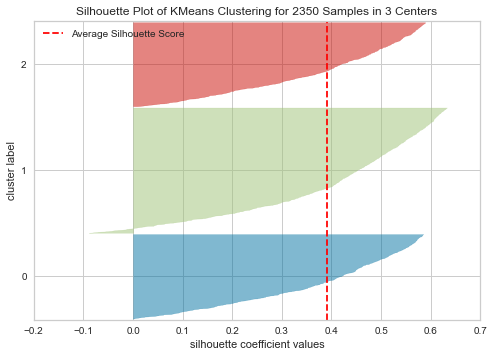

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2350 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

In [34]:
from yellowbrick.cluster import silhouette_visualizer

silhouette_visualizer(KMeans(3, random_state=42), X, colors='yellowbrick')

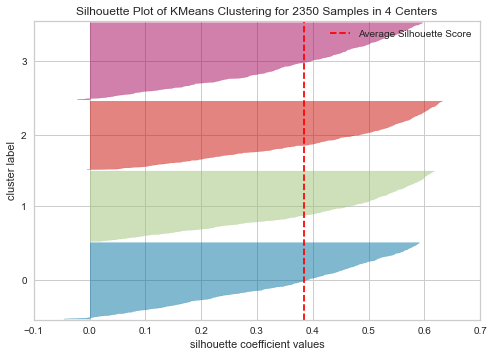

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2350 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=42))

In [35]:
silhouette_visualizer(KMeans(4, random_state=42), X, colors='yellowbrick')

### Conclusion

- K Means clustering can handle big datasets. This is because the time complexity of K Means is linear as O(n). 

- In K Means clustering, since we start with random choice of clusters, the results produced by running the algorithm multiple times might differ. 

- K Means clustering requires prior knowledge of K as no. of clusters you want to divide your data into. 